# Regression notebook for USA

In [1]:
from utils import plots, data_utils, regression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading data

In [2]:
"""explanatory = pd.read_excel("../data/clean/worldbank_data_usa_clean.xlsx")"""
usa_df = data_utils.concatenate_gdp("../data/clean/worldbank_data_usa_clean.xlsx", "USA")


### Dropping military expenditure as a column & renaming first column to Year

In [3]:
usa_df["Unnamed: 0"] = usa_df["Unnamed: 0"].apply(lambda x: x.split()[0])
usa_df = usa_df.drop(columns=["Military expenditure (current USD)"])
usa_df = usa_df.rename(columns={"Unnamed: 0":"Year"})

In [4]:
usa_df = data_utils.concatenate_gdp_growth(usa_df)
usa_df

,Year,Natural Log of GDP per capita (current US$),Gross domestic savings (current US$),"Labor force, total","Net trade in goods and services (BoP, current US$)",Consumer price index (2010 = 100),"Foreign direct investment, net (BoP, current US$)",GDP,gdp growth rate
3,1993,10.180638,1333535000000,131792391,-70311000000,66.248425,32570000000,6858559000000,0.150158
4,1994,10.229002,1458170000000,134076659,-98511000000,67.975813,34050000000,7287236000000,0.183352
5,1995,10.264334,1535416000000,135975697,-96387000000,69.882820,40980000000,7639749000000,0.171682
6,1996,10.307876,1655638000000,138055157,-104035000000,71.931229,5360000000,8073122000000,0.177087
7,1997,10.356445,1820236457000,140577814,-108288000000,73.612758,-770000000,8577554457000,0.177066
8,1998,10.399819,1917962202000,142198651,-166130000000,74.755433,-36390000000,9062818202000,0.186272
9,1999,10.449161,1995989489000,144105404,-255813000000,76.391102,-64964000000,9631174489000,0.192993
10,2000,10.500398,2046180997000,146165416,-369689000000,78.970721,-162755000000,10250947997000,0.195090
11,2001,10.522278,1969977774000,147200475,-360373000000,81.202568,-26455000000,10581929774000,0.167620
12,2002,10.545282,1934352955000,148166550,-420666000000,82.490467,67930000000,10929112955000,0.134764


## Plotting GDP over time

Text(0.5, 0, 'Year')

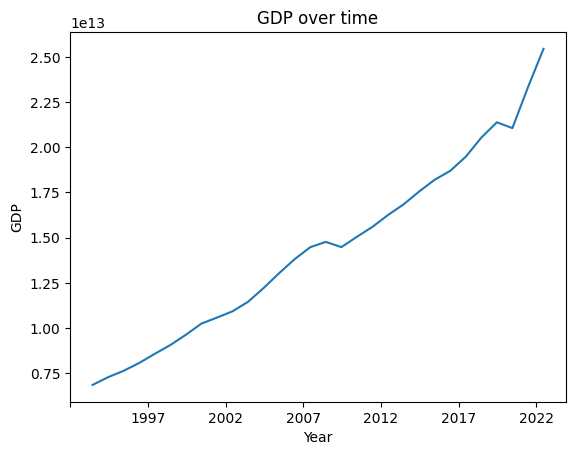

In [5]:
fig, ax = plt.subplots()
ax.plot(usa_df["Year"], usa_df["GDP"])
ax.title.set_text("GDP over time")
ax.set_ylabel("GDP")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5))
ax.set_xlabel("Year")

## Plotting variables over time

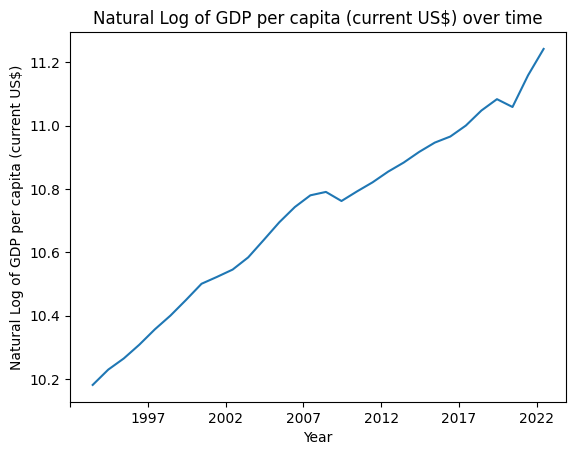

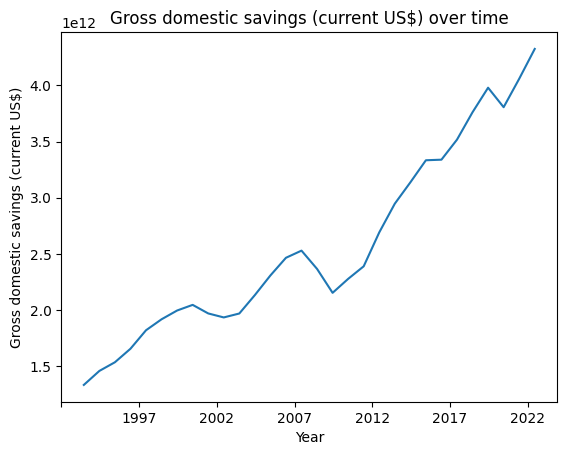

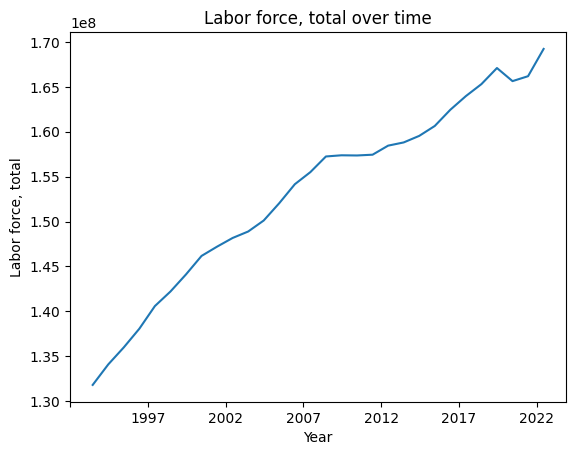

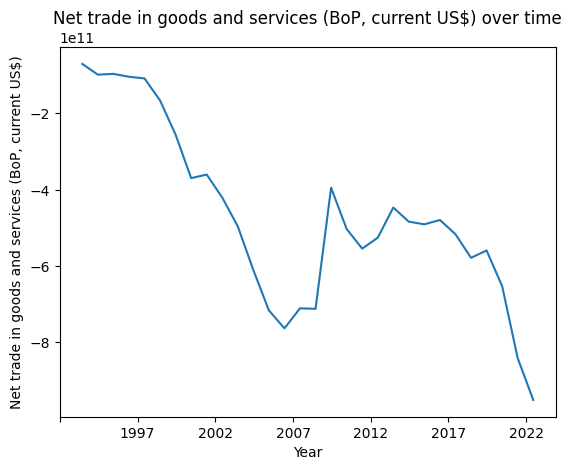

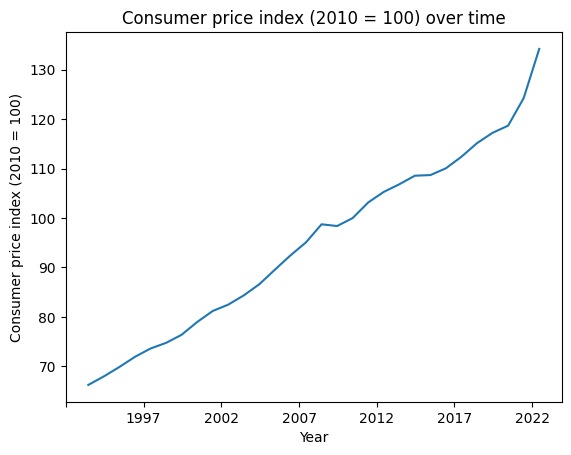

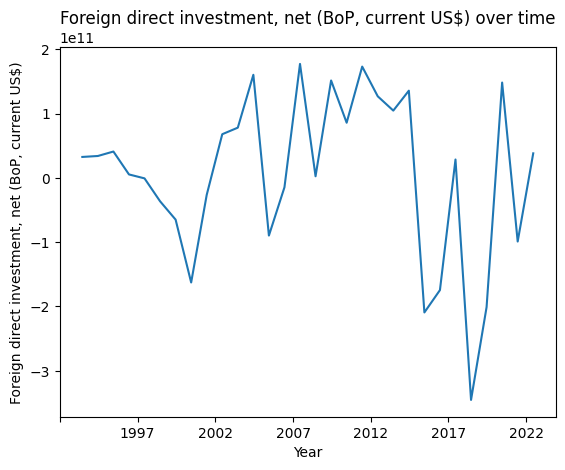

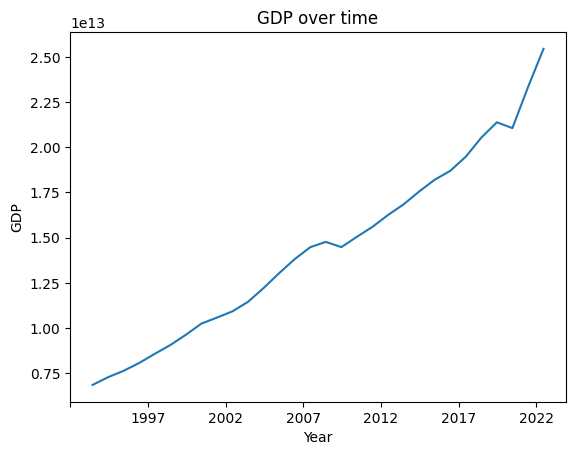

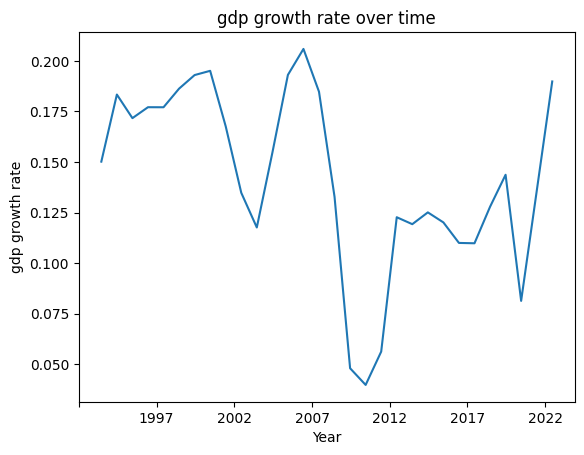

In [6]:
plots.create_plots(usa_df)

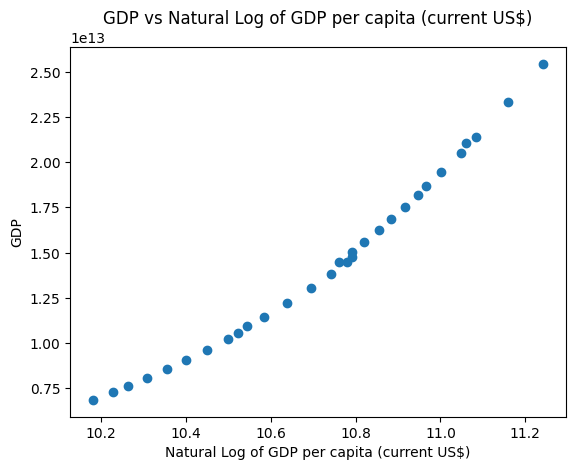

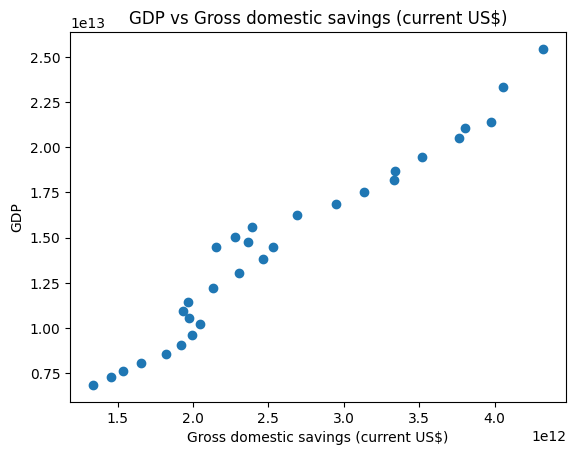

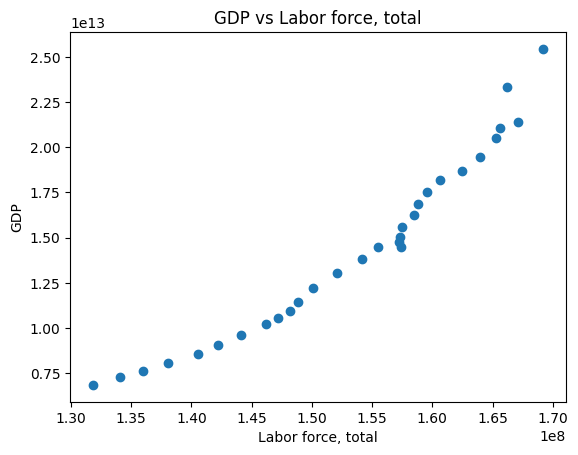

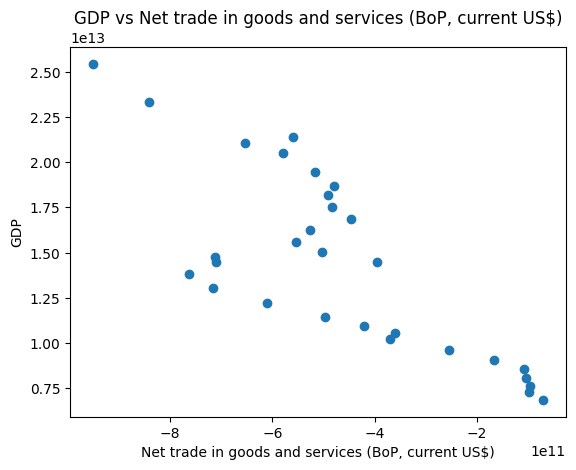

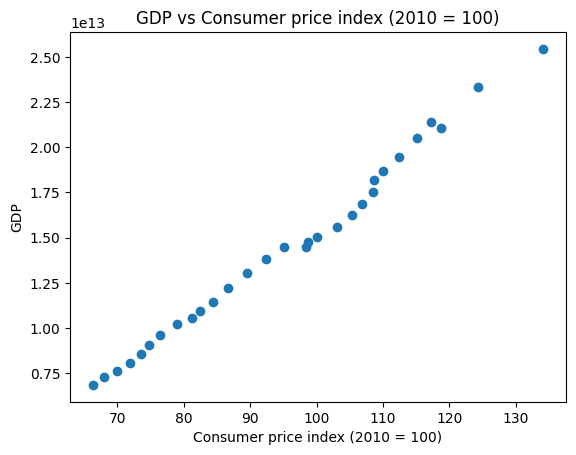

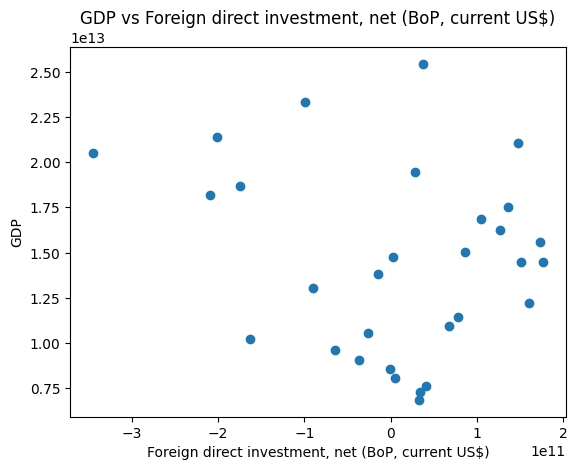

In [7]:
plots.plot_vs_gdp(usa_df)

In [8]:
usa_df = data_utils.drop_rows_for_reg(usa_df)
usa_df

,Year,Natural Log of GDP per capita (current US$),Gross domestic savings (current US$),"Labor force, total","Net trade in goods and services (BoP, current US$)",Consumer price index (2010 = 100),"Foreign direct investment, net (BoP, current US$)",GDP,gdp growth rate
0,1993,10.180638,1.333535e+12,131792391.0,-7.031100e+10,66.248425,3.257000e+10,6.858559e+12,0.150158
1,1996,10.307876,1.655638e+12,138055157.0,-1.040350e+11,71.931229,5.360000e+09,8.073122e+12,0.177087
2,1999,10.449161,1.995989e+12,144105404.0,-2.558130e+11,76.391102,-6.496400e+10,9.631174e+12,0.192993
3,2002,10.545282,1.934353e+12,148166550.0,-4.206660e+11,82.490467,6.793000e+10,1.092911e+13,0.134764
4,2005,10.694746,2.308106e+12,152044690.0,-7.165370e+11,89.560532,-8.975300e+10,1.303920e+13,0.193070
5,2008,10.790762,2.366335e+12,157246174.0,-7.123520e+11,98.737477,2.491000e+09,1.476986e+13,0.132727
6,2011,10.821097,2.389560e+12,157443452.0,-5.545170e+11,103.156842,1.731190e+11,1.559973e+13,0.056187
7,2014,10.917338,3.136701e+12,159540139.0,-4.839510e+11,108.566932,1.356730e+11,1.755068e+13,0.125063
8,2017,11.000561,3.517168e+12,163971527.0,-5.169350e+11,112.411557,2.859000e+10,1.947734e+13,0.109777
9,2020,11.059246,3.805933e+12,165641653.0,-6.528850e+11,118.690502,1.482990e+11,2.106047e+13,0.081281


In [9]:
X, y = regression.create_regression_data_OLS(usa_df)
model = regression.fit_model(X, y)

In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        gdp growth rate   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     7.128
Date:                Mon, 22 Apr 2024   Prob (F-statistic):             0.0401
Time:                        17:52:13   Log-Likelihood:                 28.722
No. Observations:                  10   AIC:                            -45.44
Df Residuals:                       4   BIC:                            -43.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

c:\Users\adity\OneDrive\Documents\college\2-2\EGD\egd-assignment\egd-env\lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  k, _ = kurtosistest(a, axis)
